### **1. 시계열 예측과 정상성**

### **2. 통계적 정상성 검증**

In [1]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
#코드 12-1
import yfinance as yf

In [3]:
#코드 12-2
tsla = yf.download('TSLA', start='2018-01-01', end='2022-12-31')
tsla.info()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2018-01-02 to 2022-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, TSLA)   1259 non-null   float64
 1   (High, TSLA)    1259 non-null   float64
 2   (Low, TSLA)     1259 non-null   float64
 3   (Open, TSLA)    1259 non-null   float64
 4   (Volume, TSLA)  1259 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [4]:
#코드 12-3
import pandas as pd
df_tsla = pd.DataFrame(tsla['Close'])

<Axes: xlabel='Date'>

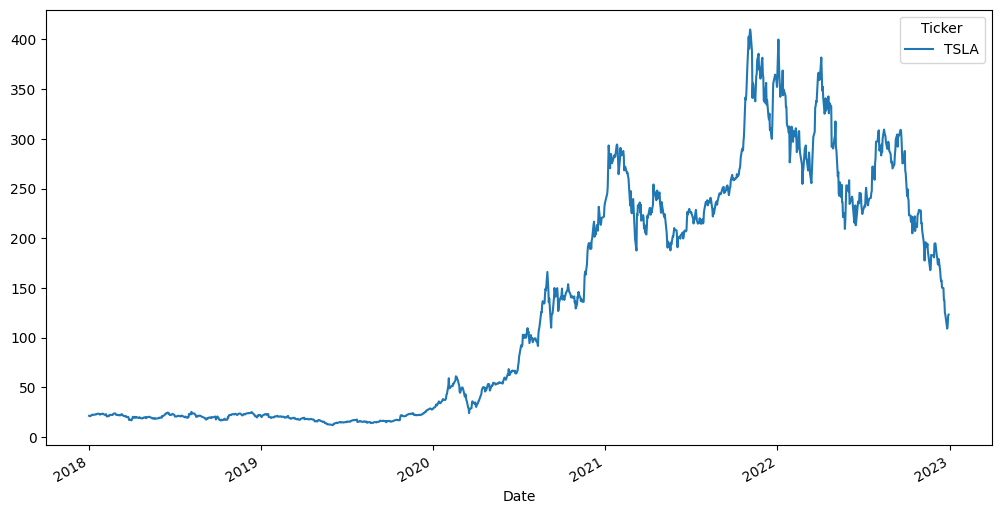

In [5]:
#코드 12-4
import matplotlib.pyplot as plt
df_tsla.plot(figsize=(12.2, 6.4))

In [6]:
#코드 12-5
from statsmodels.tsa.stattools import adfuller

print('ADF test with TSLA time-series')
ADF_result = adfuller(df_tsla.values)
#ADF 통계량
print('ADF Stats: %f' % ADF_result[0])
#p-값
print('p-value: %f' % ADF_result[1])
#임계값
print('Critical values:' )
for key, value in ADF_result[4].items():
  print('\t%s: %.4f' % (key, value))

ADF test with TSLA time-series
ADF Stats: -1.301076
p-value: 0.628680
Critical values:
	1%: -3.4356
	5%: -2.8639
	10%: -2.5680


In [14]:
df_tsla

Ticker,TSLA
Date,
2018-01-02,21.368668
2018-01-03,21.150000
2018-01-04,20.974667
2018-01-05,21.105333
2018-01-08,22.427334
...,...
2022-12-23,123.150002
2022-12-27,109.099998
2022-12-28,112.709999


In [7]:
#코드 12-6
from statsmodels.tsa.stattools import kpss

print('KPSS test with TSLA time-series')
KPSS_result = kpss(df_tsla.values)
#KPSS 통계량
print('KPSS Stats: %f' % KPSS_result[0])
#p-값
print('p-value: %f' % KPSS_result[1])
#임계값
print('Critical values:' )
for key, value in KPSS_result[3].items():
  print('\t%s: %.4f' % (key, value))

KPSS test with TSLA time-series
KPSS Stats: 4.913280
p-value: 0.010000
Critical values:
	10%: 0.3470
	5%: 0.4630
	2.5%: 0.5740
	1%: 0.7390


C:\Users\asia\AppData\Local\Temp\ipykernel_19768\921837228.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  KPSS_result = kpss(df_tsla.values)
